In [1]:
## Data Collection
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import  pandas as pd

## load the dataset
data=gutenberg.raw('shakespeare-hamlet.txt')
## save to a file
with open('hamlet.txt','w') as file:
    file.write(data)

[nltk_data] Downloading package gutenberg to C:\Users\sameer
[nltk_data]     sheikh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


In [8]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

##laod the dataset
with open('hamlet.txt','r') as file:
    text=file.read().lower()

## Tokenize the text-creating indexes for words
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])
total_words=len(tokenizer.word_index)
total_words

4818

In [9]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [20]:
## create inoput sequences
input_sequences=[]
for line in text.split('\n'):
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence=token_list[:i+1]
        input_sequences.append(n_gram_sequence)

        

In [21]:
input_sequences

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [52]:
## Pad Sequences
max_sequence_len=max([len(x) for x in input_sequences])
max_sequence_len

14

In [23]:
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))
input_sequences

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]])

In [34]:
##create predicitors and label
import tensorflow as tf
x,y=input_sequences[:,:-1],input_sequences[:,-1]

In [35]:
x

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]])

In [37]:
y

array([ 687,    4,   45, ..., 1047,    4,  193])

In [38]:
y=tf.keras.utils.to_categorical(y,num_classes=total_words)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [40]:
# Define early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [59]:
## Train our LSTM RNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,GRU

## Define the model
model=Sequential()
model.add(Embedding(input_dim=total_words,output_dim=100,input_length=max_sequence_len))
model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words,activation="softmax"))

# #Compile the model
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None,max_sequence_len))
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 14, 100)             │         481,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 14, 150)             │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 14, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 100)                 │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4818)                │         486,618 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,219,418 (4.65 MB)

 Trainable params: 1,219,418 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
#train the model
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.0361 - loss: 6.4254 - val_accuracy: 0.0418 - val_loss: 7.0553
Epoch 2/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 33s 65ms/step - accuracy: 0.0423 - loss: 6.2686 - val_accuracy: 0.0457 - val_loss: 7.1547
Epoch 3/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.0514 - loss: 6.1533 - val_accuracy: 0.0447 - val_loss: 7.1340
Epoch 4/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.0537 - loss: 6.0200 - val_accuracy: 0.0452 - val_loss: 7.1802


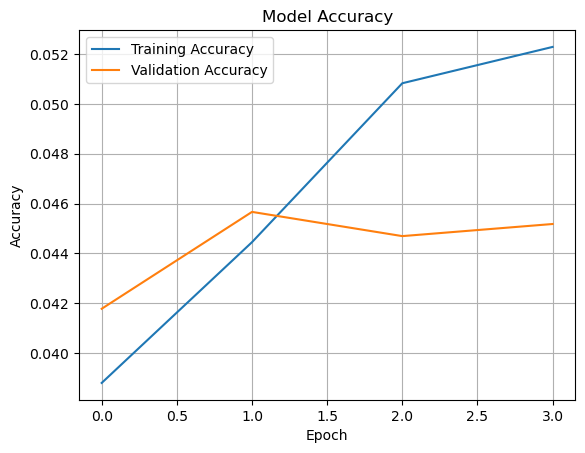

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


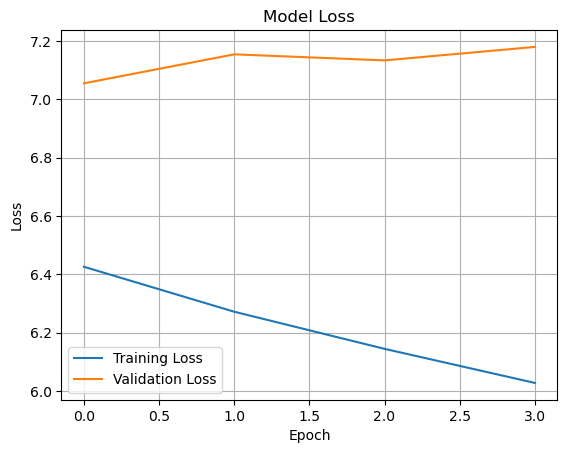

In [65]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [73]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_len:
        token_list = token_list[-(max_sequence_len):]  # Ensure the sequence length matches max_sequence_len-1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

In [118]:
input_text="i am here for"
print(f"Input text:{input_text}")
max_sequence_len=model.input_shape[1]+1
next_word=predict_next_word(model,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:i am here for
Next Word PRediction:the


In [116]:
## Save the model
model.save("next_word_lstm.h5")
## Save the tokenizer
import pickle
with open('tokenizer.pickle','wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

# understanding outputs for self

In [123]:
model.input_shape

(None, 14)

In [124]:
model.input_shape[1]

14

In [113]:
token_listt=tokenizer.texts_to_sequences(["i am here for"])[0]
print(token_listt)
token_listt = pad_sequences([token_listt], maxlen=max_sequence_len, padding='pre')
token_listt

[5, 92, 471, 20]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,  92,
        471,  20]])

In [98]:
aa=model.predict(token_listt)
aa

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[7.27091560e-08, 6.61315322e-02, 3.04689743e-02, ...,
        6.94174176e-08, 6.93656759e-08, 1.09168425e-07]], dtype=float32)

In [101]:
predicted_word_indexx = np.argmax(aa, axis=1)
predicted_word_indexx

array([1], dtype=int64)

In [108]:
for wordd, indexx in tokenizer.word_index.items():
    if indexx == predicted_word_indexx:
        print( wordd)

the
